In [3]:
import awkward
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

(3579266, 1)


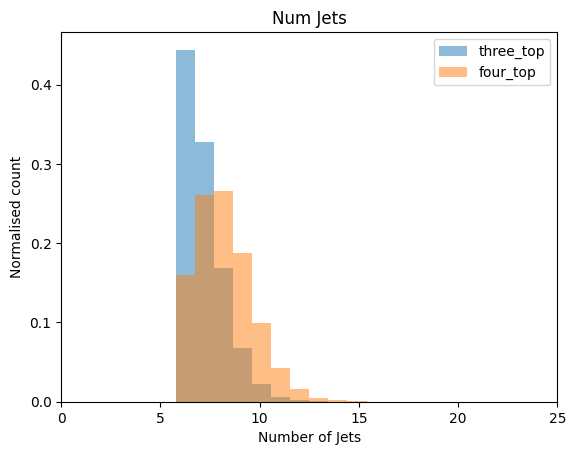

In [19]:
file_path = "../../data/fourtopvsthree/rawh5pyfiles/fourtop3topall.h5"

with h5py.File(file_path) as f:
    four_top_indices = f["targets"][()].astype(bool)
    print(four_top_indices.shape)
    three_top_indices = ~four_top_indices

    num_objects = 23 - np.sum(np.all(np.isnan(f["particle_data"]), axis = 2).astype(int),  axis = 1) 
    num_objects = num_objects.reshape(-1, 1)
    plt.title("Num Jets")
    plt.xlim(0, 25)
    plt.xlabel("Number of Jets")
    plt.ylabel("Normalised count")
    plt.hist(num_objects[three_top_indices], label = "three_top", bins = 26, range = (0, 25), alpha = 0.5,  density=  True)
    plt.hist(num_objects[four_top_indices], label = "four_top", bins = 26, range = (0, 25), alpha = 0.5, density  = True)
    
    plt.legend()

(3579266, 1)
(3579266,)


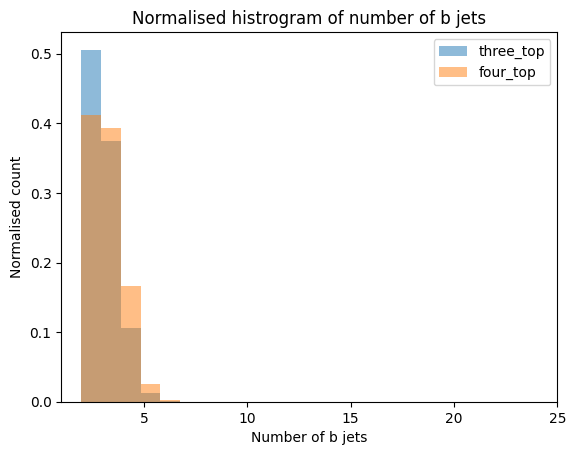

In [5]:
file_path = "../../data/fourtopvsthree/rawh5pyfiles/fourtop3topall.h5"

with h5py.File(file_path) as f:
    four_top_indices = f["targets"][()].astype(bool)
    print(four_top_indices.shape)
    three_top_indices = ~four_top_indices

    num_b_jets = np.sum(np.nan_to_num(f["particle_data"], nan = 0)[:, :, 5], axis = 1)
    print(num_b_jets.shape)
    num_b_jets = num_b_jets.reshape(-1, 1)
    plt.title("Normalised histrogram of number of b jets")
    plt.xlabel("Number of b jets")
    plt.ylabel("Normalised count")
    plt.xlim(1, 25)
    plt.hist(num_b_jets[three_top_indices], label = "three_top", bins = 25, range = (1, 25), alpha = 0.5, weights = np.full_like(num_b_jets[three_top_indices], 1 / num_b_jets[three_top_indices].shape[0]))
    plt.hist(num_b_jets[four_top_indices], label = "four_top", bins = 25, range = (1, 25), alpha = 0.5, weights = np.full_like(num_b_jets[four_top_indices], 1 / num_b_jets[four_top_indices].shape[0]))
    plt.legend()

(3579266, 1)
[ 0.  0.  0.  0.  0.  0.  0.  1. -1. nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan]
[2. 2. 2. ... 2. 2. 2.]
0.5680452360903046


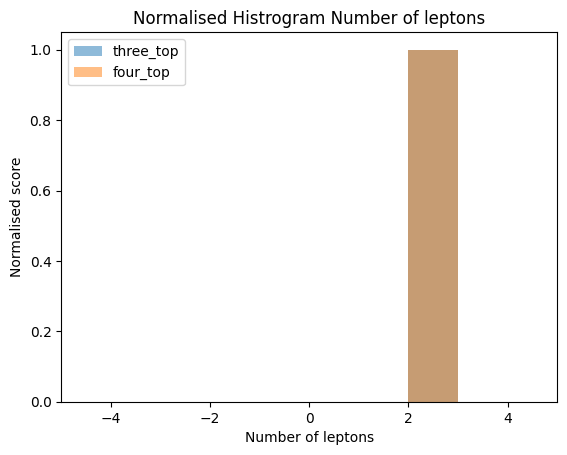

In [ ]:
file_path = "../../data/fourtopvsthree/rawh5pyfiles/fourtop3topall.h5"

with h5py.File(file_path) as f:
    four_top_indices = f["targets"][()].astype(bool)
    print(four_top_indices.shape)
    three_top_indices = ~four_top_indices
    print(f["particle_data"][0,..., 4])
    num_leptons = np.sum(np.nan_to_num(f["particle_data"][:, :, 4], nan = 0), axis = 1)
    print(num_leptons)
    num_leptons = num_leptons.reshape(-1, 1)
    y_pred = (abs(np.round(num_leptons)) == 2)
    accuracy = np.mean(y_pred == four_top_indices)
    print(accuracy)
    plt.title("Normalised Histrogram Total charge of event")
    plt.xlabel("Total event charge")
    plt.ylabel("Normalised score")
    plt.xlim(-5, 5)
    plt.hist(num_leptons[three_top_indices], label = "three_top", bins = 10, range = (-5, 5), alpha = 0.5, weights = np.full_like(num_leptons[three_top_indices], 1 / num_leptons[three_top_indices].shape[0]))
    plt.hist(num_leptons[four_top_indices], label = "four_top", bins = 10, range = (-5, 5), alpha = 0.5, weights = np.full_like(num_leptons[four_top_indices], 1 / num_leptons[four_top_indices].shape[0]))
    
    plt.legend()

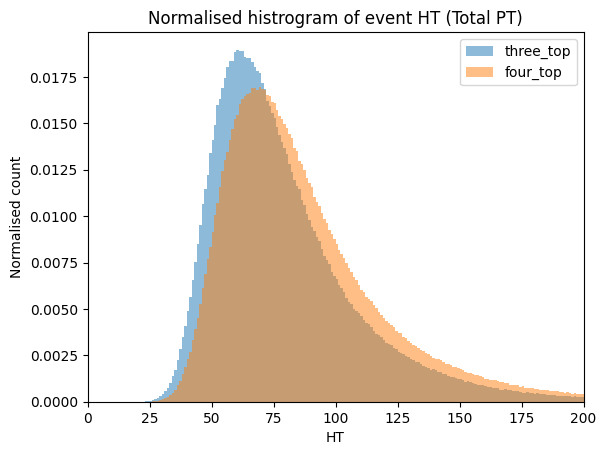

In [17]:
file_path = "../../data/fourtopvsthree/rawh5pyfiles/fourtop3topall.h5"

with h5py.File(file_path) as f:
    four_top_indices = f["targets"][()].astype(bool)

    three_top_indices = ~four_top_indices

    total_pt = np.sum(np.nan_to_num(f["particle_data"][:, :, 3], nan = 0), axis = 1)

    total_pt = total_pt.reshape(-1, 1)

    plt.title("Normalised histrogram of event HT (Total PT)")
    plt.ylabel("Normalised count")
    plt.xlabel("HT")

    plt.xlim(0, 200)
    plt.hist(total_pt[three_top_indices], label = "three_top", bins = 200, range = (0, 200), alpha = 0.5, density = True)
    plt.hist(total_pt[four_top_indices], label = "four_top", bins = 200, range = (0, 200), alpha = 0.5, density = True)
    
    plt.legend()

(3579266, 1)
(1285516, 1)
(268775,)


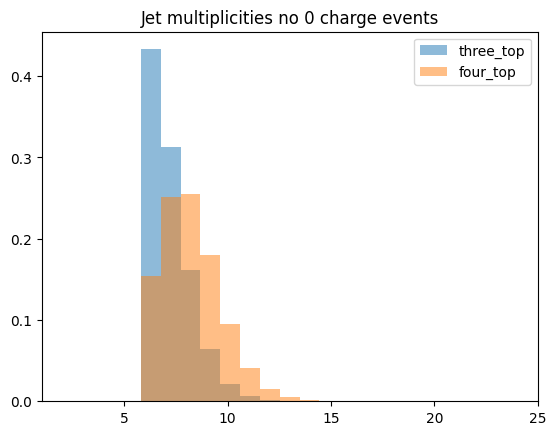

In [8]:
file_path = "../../data/fourtopvsthree/rawh5pyfiles/fourtop3topall.h5"

with h5py.File(file_path) as f:
    four_top_indices = f["targets"][()].astype(bool)
    print(four_top_indices.shape)
    three_top_indices = ~four_top_indices

    tot_charge = np.sum(np.nan_to_num(f["particle_data"][:, :, 4], nan = 0), axis = 1)
    number_leptons = np.sum(
        abs(
            np.nan_to_num(f["particle_data"][:, :, 4], nan = 0)
            ),  axis = 1
            )

    tot_charge_mask = (tot_charge == 2).astype(bool)
    
    four_top_indices = four_top_indices[tot_charge_mask]
    three_top_indices = three_top_indices[tot_charge_mask]
    number_leptons = number_leptons[tot_charge_mask]


    num_objects = 25 - np.sum(np.all(np.isnan(f["particle_data"]), axis = 2).astype(int),  axis = 1)

    num_objects = num_objects[tot_charge_mask]

    num_objects = num_objects - number_leptons

    num_objects = num_objects.reshape(-1, 1)
    plt.title("Jet multiplicities no 0 charge events")
    plt.xlim(1, 25)
    print(three_top_indices.shape)
    print(num_objects[three_top_indices].shape)
    plt.hist(num_objects[three_top_indices] , label = "three_top", bins = 25, range = (1, 25), alpha = 0.5, weights = np.full_like(num_objects[three_top_indices], 1 / num_objects[three_top_indices].shape[0]))
    plt.hist(num_objects[four_top_indices], label = "four_top", bins = 25, range = (1, 25), alpha = 0.5,  weights = np.full_like(num_objects[four_top_indices], 1 / num_objects[four_top_indices].shape[0]))
    
    plt.legend()